# Project 2 Report and Code Output
## By Alejandro Rigau
### March 26, 2021

In [1]:
import sqlite3
import pandas
import matplotlib.pyplot as plt
import numpy as np

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

# Problem 1
In this part I made two different queries that I would later join using the pandas merge by outer. Two different queries just made it easier to visualize what was going on and it was still easy to join the two tables. For missing values, I decided that it would be enough to just drop the row that had NaN just because it meant that there was missing information for a team during a specific time period. The reason there was missing data is because it never existed in the first place. Here everything will be joined to the ```teams``` database which we will use for the next problems.

In [2]:
salary_query = "SELECT teamID, yearID, sum(salary) as total_payroll, sum(salary)/count(salary) as mean_payroll FROM Salaries GROUP BY teamID, yearID"

team_salaries = pandas.read_sql(salary_query, conn)
team_salaries.head()

,teamID,yearID,total_payroll,mean_payroll
0,ATL,1985,14807000.0,673045.454545
1,BAL,1985,11560712.0,525486.909091
2,BOS,1985,10897560.0,435902.400000
3,CAL,1985,14427894.0,515281.928571
4,CHA,1985,9846178.0,468865.619048


Talk about missing values

In [3]:
team_query = "SELECT cast(W as float)/cast(G as float)*100 as win_rate, yearID, teamID, franchID, G, W FROM Teams GROUP BY teamID, yearID"
team_win_rate = pandas.read_sql(team_query, conn)
team_win_rate

,win_rate,yearID,teamID,franchID,G,W
0,24.000000,1884,ALT,ALT,25,6
1,51.851852,1997,ANA,ANA,162,84
2,52.469136,1998,ANA,ANA,162,85
3,43.209877,1999,ANA,ANA,162,70
4,50.617284,2000,ANA,ANA,162,82
...,...,...,...,...,...,...
2770,36.507937,1887,WS8,WNL,126,46
2771,35.294118,1888,WS8,WNL,136,48
2772,32.283465,1889,WS8,WNL,127,41
2773,31.654676,1891,WS9,WAS,139,44


In [4]:
teams = pandas.merge(team_salaries, team_win_rate, how='outer', on=['teamID','yearID'])
teams.sort_values("yearID", ascending=True)
teams = teams.dropna()
teams

,teamID,yearID,total_payroll,mean_payroll,win_rate,franchID,G,W
0,ATL,1985,14807000.0,6.730455e+05,40.740741,ATL,162.0,66.0
1,BAL,1985,11560712.0,5.254869e+05,51.552795,BAL,161.0,83.0
2,BOS,1985,10897560.0,4.359024e+05,49.693252,BOS,163.0,81.0
3,CAL,1985,14427894.0,5.152819e+05,55.555556,ANA,162.0,90.0
4,CHA,1985,9846178.0,4.688656e+05,52.147239,CHW,163.0,85.0
...,...,...,...,...,...,...,...,...
855,SLN,2014,120693000.0,4.310464e+06,55.555556,STL,162.0,90.0
856,TBA,2014,72689100.0,2.907564e+06,47.530864,TBD,162.0,77.0
857,TEX,2014,112255059.0,4.677294e+06,41.358025,TEX,162.0,67.0
858,TOR,2014,109920100.0,4.396804e+06,51.234568,TOR,162.0,83.0


# Problem 2
For this problem I filtered the ```teams``` dataframe that I created in problem 1 to only have values from 1990 to 2014. After that, I plotted each teams payroll with respect to time. The payroll was calculated by adding up the payroll of each player in the team. 

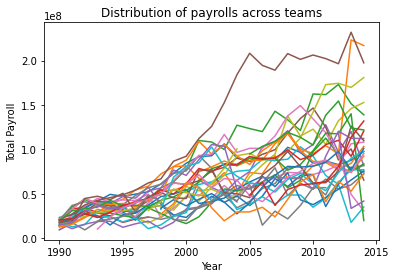

In [5]:
teams = teams[teams['yearID'] >= 1990] 
teams = teams[teams['yearID'] <= 2014]
for team in teams['teamID'].unique():
    plt.plot(teams.loc[teams['teamID'] == team]["yearID"], teams.loc[teams['teamID'] == team]["total_payroll"])
plt.xlabel("Year")
plt.ylabel("Total Payroll")
plt.title("Distribution of payrolls across teams")
plt.show()

# Question 1
In the previous plot, each line represents a teams payroll through time. Intuitively we can see that the amount of money these teams are getting is increasing through out all teams. We can also observe gaps forming between teams as time progresses and this means that some teams have way higher payroll than other teams.

# Problem 3
In this section I created a new SQL query to make it easier to get the mean payroll per year for the whole dataset. I could have used the ```teams``` dataframe but it just seemed easier to do a new SQL query. Then, I used the new data to plot the mean payroll with respect to time. 

In [6]:
mean_query = "SELECT yearID, sum(salary)/count(salary) as mean FROM Salaries GROUP BY yearID"

mean = pandas.read_sql(mean_query, conn)
mean.head()

,yearID,mean
0,1985,476299.447273
1,1986,417147.043360
2,1987,434729.465710
3,1988,453171.076923
4,1989,506323.081575


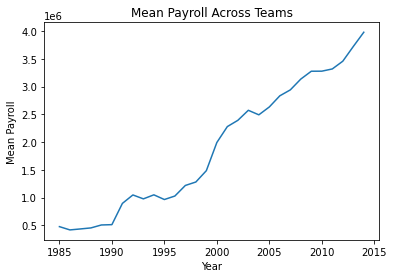

In [7]:
plt.plot(mean["yearID"], mean["mean"])
plt.xlabel("Year")
plt.ylabel("Mean Payroll")
plt.title("Mean Payroll Across Teams")
plt.show()

# Problem 4
Here I used the ```teams``` dataframe I created in problem 1 to make 5 different plots. Each plot represents a small section of the data where we can see the mean win rate and mean payroll though this section in time that we are analyzing. I utilized the ```pandas.groupby``` function to group by teamID and get the mean for the payroll and win rate of each year. I repeated this for the 5 sections of time that we are analyzing. 

In [8]:
section1 = teams[(teams['yearID'] >= 1990) & (teams['yearID'] <= 1994)]
section1 = section1.groupby('teamID', as_index=False)[["total_payroll", "win_rate"]].mean()
section1.head()

,teamID,total_payroll,win_rate
0,ATL,31721852.8,56.497726
1,BAL,23785204.0,50.444080
2,BOS,34863216.8,49.514761
3,CAL,28654777.4,45.704777
4,CHA,27090400.4,56.426308


In [9]:
section2 = teams[(teams['yearID'] >= 1995) & (teams['yearID'] <= 1999)]
section2 = section2.groupby('teamID', as_index=False)[["total_payroll", "win_rate"]].mean()

section3 = teams[(teams['yearID'] >= 2000) & (teams['yearID'] <= 2004)]
section3 = section3.groupby('teamID', as_index=False)[["total_payroll", "win_rate"]].mean()

section4 = teams[(teams['yearID'] >= 2005) & (teams['yearID'] <= 2009)]
section4 = section4.groupby('teamID', as_index=False)[["total_payroll", "win_rate"]].mean()

section5 = teams[(teams['yearID'] >= 2010) & (teams['yearID'] <= 2014)]
section5 = section5.groupby('teamID', as_index=False)[["total_payroll", "win_rate"]].mean()

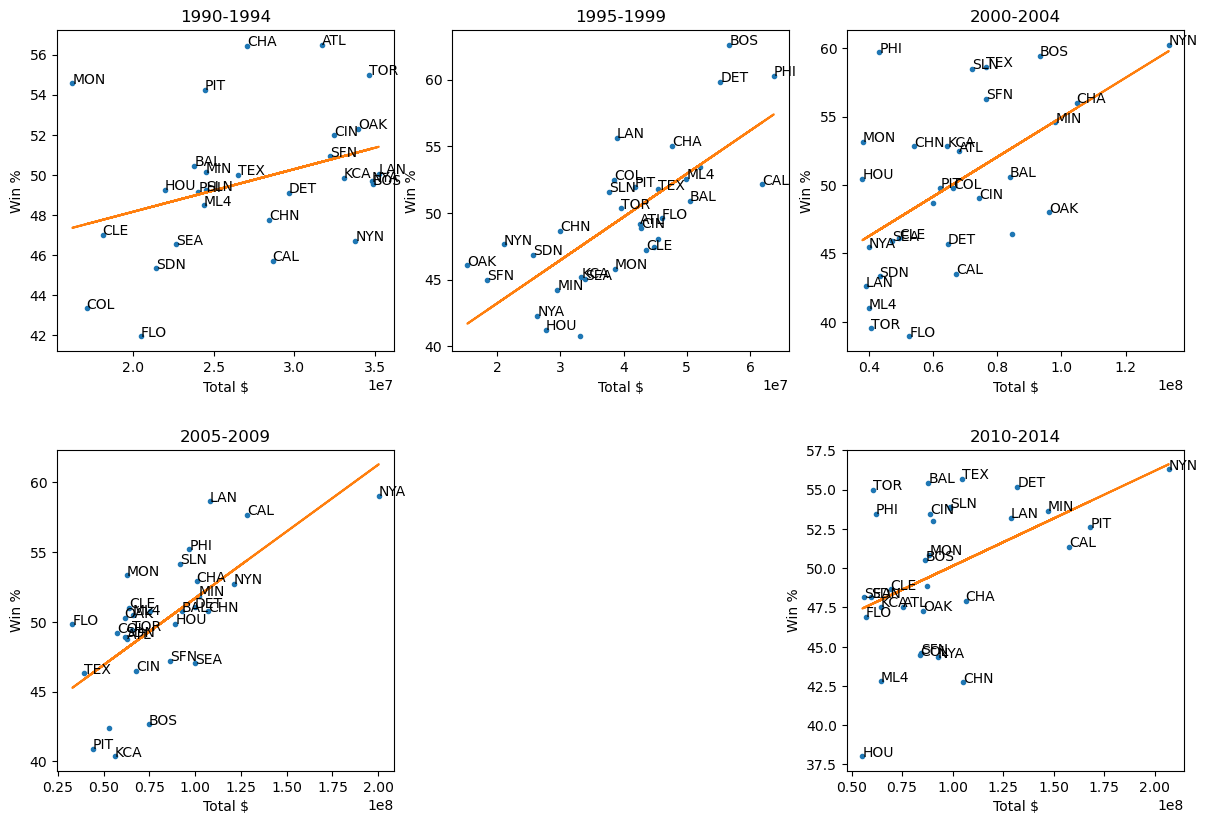

In [10]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(236)

plt.tight_layout(h_pad=5.0)

ax1.title.set_text('1990-1994')
ax2.title.set_text('1995-1999')
ax3.title.set_text('2000-2004')
ax4.title.set_text('2005-2009')
ax5.title.set_text('2010-2014')

ax1.set_xlabel('Total $')
ax2.set_xlabel('Total $')
ax3.set_xlabel('Total $')
ax4.set_xlabel('Total $')
ax5.set_xlabel('Total $')

ax1.set_ylabel('Win %')
ax2.set_ylabel('Win %')
ax3.set_ylabel('Win %')
ax4.set_ylabel('Win %')
ax5.set_ylabel('Win %')

ax1.plot(section1["total_payroll"], section1["win_rate"], '.')
ax2.plot(section2["total_payroll"], section2["win_rate"], '.')
ax3.plot(section3["total_payroll"], section3["win_rate"], '.')
ax4.plot(section4["total_payroll"], section4["win_rate"], '.')
ax5.plot(section5["total_payroll"], section5["win_rate"], '.')

for i, txt in enumerate(section1["teamID"]):
    ax1.annotate(txt, (section1["total_payroll"][i], section1["win_rate"][i]))
    ax2.annotate(txt, (section2["total_payroll"][i], section2["win_rate"][i]))
    ax3.annotate(txt, (section3["total_payroll"][i], section3["win_rate"][i]))
    ax4.annotate(txt, (section4["total_payroll"][i], section4["win_rate"][i]))
    ax5.annotate(txt, (section5["total_payroll"][i], section5["win_rate"][i]))


m, b = np.polyfit(section1["total_payroll"], section1["win_rate"],1)
ax1.plot(section1["total_payroll"], m * section1["total_payroll"] + b, '-')

m, b = np.polyfit(section2["total_payroll"], section2["win_rate"],1)
ax2.plot(section2["total_payroll"], m * section2["total_payroll"] + b, '-')

m, b = np.polyfit(section3["total_payroll"], section3["win_rate"],1)
ax3.plot(section3["total_payroll"], m * section3["total_payroll"] + b, '-')

m, b = np.polyfit(section4["total_payroll"], section4["win_rate"],1)
ax4.plot(section4["total_payroll"], m * section4["total_payroll"] + b, '-')

m, b = np.polyfit(section5["total_payroll"], section5["win_rate"],1)
ax5.plot(section5["total_payroll"], m * section5["total_payroll"] + b, '-')


plt.show()

# Question 2
These graphs represent the team payrolls versus their win percentage across different time periods. We can see from our regression lines that it seems to be very consistent how the teams with the highest payrolls have the highest winrates. A team that particularly stands out at paying for wins is NYN because we can consistently see that whenever their payroll was the highest (2000-2004 and 2010-2014), their win rate was also the highest. This data makes sense because the highest skilled players would be the most expensive to have in their teams, and having good players will give the team a higher win rate. From the different graphs, we can see that Oakland A's performance varies. It seems to be consistent that the higher their payroll is, the higher their win rate. During the 1995-1999 period, they had the lowest payroll but they were also one of the worst performing teams but during 1990-1994 they had one of the highest payrolls and were on the best performing teams. 

# Problem 5
Here I create a new column to my ```teams``` dataframe where I apply the formula $standarized payroll = \frac{payroll - avg payroll}{standard deviation}$ by using the ```groupby``` and the ```transform``` functions. 

In [11]:
teams.head()

,teamID,yearID,total_payroll,mean_payroll,win_rate,franchID,G,W
130,ATL,1990,14555501.0,454859.406250,40.123457,ATL,162.0,65.0
131,BAL,1990,9680084.0,261623.891892,47.204969,BAL,161.0,76.0
132,BOS,1990,20558333.0,642447.906250,54.320988,BOS,162.0,88.0
133,CAL,1990,21720000.0,620571.428571,49.382716,ANA,162.0,80.0
134,CHA,1990,9491500.0,306177.419355,58.024691,CHW,162.0,94.0


In [12]:
teams['standardized_payroll'] = teams.groupby('yearID')['total_payroll'].transform(lambda x: (x - x.mean()) / x.std())
teams

,teamID,yearID,total_payroll,mean_payroll,win_rate,franchID,G,W,standardized_payroll
130,ATL,1990,14555501.0,4.548594e+05,40.123457,ATL,162.0,65.0,-0.667275
131,BAL,1990,9680084.0,2.616239e+05,47.204969,BAL,161.0,76.0,-1.959861
132,BOS,1990,20558333.0,6.424479e+05,54.320988,BOS,162.0,88.0,0.924213
133,CAL,1990,21720000.0,6.205714e+05,49.382716,ANA,162.0,80.0,1.232198
134,CHA,1990,9491500.0,3.061774e+05,58.024691,CHW,162.0,94.0,-2.009859
...,...,...,...,...,...,...,...,...,...
855,SLN,2014,120693000.0,4.310464e+06,55.555556,STL,162.0,90.0,0.457126
856,TBA,2014,72689100.0,2.907564e+06,47.530864,TBD,162.0,77.0,-0.593171
857,TEX,2014,112255059.0,4.677294e+06,41.358025,TEX,162.0,67.0,0.272509
858,TOR,2014,109920100.0,4.396804e+06,51.234568,TOR,162.0,83.0,0.221422


# Problem 6
Here I do the same thing as I did in problem 4 but the only difference is that I changed ```total_payroll``` to the ```standarized_payroll```. The rest of the code is the same. 

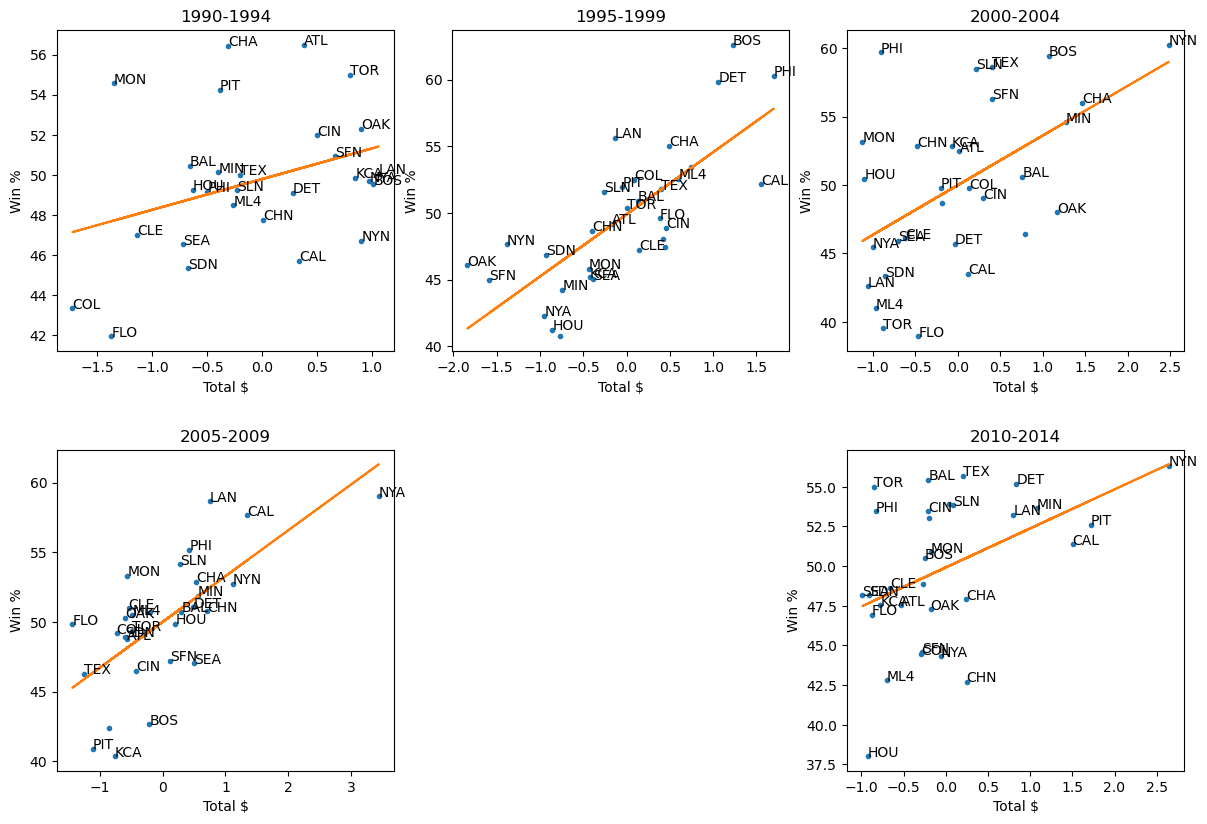

In [13]:
section1 = teams[(teams['yearID'] >= 1990) & (teams['yearID'] <= 1994)]
section1 = section1.groupby('teamID', as_index=False)[["standardized_payroll", "win_rate"]].mean()

section2 = teams[(teams['yearID'] >= 1995) & (teams['yearID'] <= 1999)]
section2 = section2.groupby('teamID', as_index=False)[["standardized_payroll", "win_rate"]].mean()

section3 = teams[(teams['yearID'] >= 2000) & (teams['yearID'] <= 2004)]
section3 = section3.groupby('teamID', as_index=False)[["standardized_payroll", "win_rate"]].mean()

section4 = teams[(teams['yearID'] >= 2005) & (teams['yearID'] <= 2009)]
section4 = section4.groupby('teamID', as_index=False)[["standardized_payroll", "win_rate"]].mean()

section5 = teams[(teams['yearID'] >= 2010) & (teams['yearID'] <= 2014)]
section5 = section5.groupby('teamID', as_index=False)[["standardized_payroll", "win_rate"]].mean()

plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(236)

plt.tight_layout(h_pad=5.0)

ax1.title.set_text('1990-1994')
ax2.title.set_text('1995-1999')
ax3.title.set_text('2000-2004')
ax4.title.set_text('2005-2009')
ax5.title.set_text('2010-2014')

ax1.set_xlabel('Total $')
ax2.set_xlabel('Total $')
ax3.set_xlabel('Total $')
ax4.set_xlabel('Total $')
ax5.set_xlabel('Total $')

ax1.set_ylabel('Win %')
ax2.set_ylabel('Win %')
ax3.set_ylabel('Win %')
ax4.set_ylabel('Win %')
ax5.set_ylabel('Win %')

ax1.plot(section1["standardized_payroll"], section1["win_rate"], '.')
ax2.plot(section2["standardized_payroll"], section2["win_rate"], '.')
ax3.plot(section3["standardized_payroll"], section3["win_rate"], '.')
ax4.plot(section4["standardized_payroll"], section4["win_rate"], '.')
ax5.plot(section5["standardized_payroll"], section5["win_rate"], '.')

for i, txt in enumerate(section1["teamID"]):
    ax1.annotate(txt, (section1["standardized_payroll"][i], section1["win_rate"][i]))
    ax2.annotate(txt, (section2["standardized_payroll"][i], section2["win_rate"][i]))
    ax3.annotate(txt, (section3["standardized_payroll"][i], section3["win_rate"][i]))
    ax4.annotate(txt, (section4["standardized_payroll"][i], section4["win_rate"][i]))
    ax5.annotate(txt, (section5["standardized_payroll"][i], section5["win_rate"][i]))


m, b = np.polyfit(section1["standardized_payroll"], section1["win_rate"],1)
ax1.plot(section1["standardized_payroll"], m * section1["standardized_payroll"] + b, '-')

m, b = np.polyfit(section2["standardized_payroll"], section2["win_rate"],1)
ax2.plot(section2["standardized_payroll"], m * section2["standardized_payroll"] + b, '-')

m, b = np.polyfit(section3["standardized_payroll"], section3["win_rate"],1)
ax3.plot(section3["standardized_payroll"], m * section3["standardized_payroll"] + b, '-')

m, b = np.polyfit(section4["standardized_payroll"], section4["win_rate"],1)
ax4.plot(section4["standardized_payroll"], m * section4["standardized_payroll"] + b, '-')

m, b = np.polyfit(section5["standardized_payroll"], section5["win_rate"],1)
ax5.plot(section5["standardized_payroll"], m * section5["standardized_payroll"] + b, '-')


plt.show()

# Question 3
These graphs represent the team standarized payrolls versus their win percentage across different time periods. By standarizing the data, we changed the actual range of the total payroll to the number of standard deviations away from the data mean. If we look at the graphs, they look the same as in problem 4 but the values in the x axis have changed to represent how far away from the mean they are. We can still see from our regression lines that it seems to be very consistent how the teams with the highest payrolls have the highest winrates. Also, we can see that NYA during the 2005-2009 period had the highest standard deviation. With this standarized variable, we can draw clearer conclusions and have a better idea of how differently each team performed.

# Problem 7
For this part I used the ```teams``` dataframe with the added ```standarized_payroll``` column to plot it versus the ```win_rate```. After that I used the ```polyfit``` numpy function to create a regression line to show the tendency of the graph. I also printed out the values of M and B that were given by the polifit to show that they are consistent with the values given in the project description. 

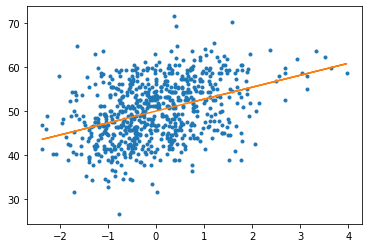

Value for b = 49.98855314843013 and value for m = 2.725103646155703


In [14]:
plt.plot(teams["standardized_payroll"], teams["win_rate"], '.')
m, b = np.polyfit(teams["standardized_payroll"], teams["win_rate"],1)
plt.plot(teams["standardized_payroll"], m * teams["standardized_payroll"] + b, '-')
plt.show()
print(f'Value for b = {b} and value for m = {m}')

# Problem 8
For this problem I first calculated the expected win percentage by using the values from B and M given by the project description. The formula is $expected = 50 + 2.5 * standarizedpayroll$. From this, we calculate the efficiency by subtracting the expected win percentage from the win percentage. After these calculations, I add the efficiency column to the ```teams``` dataframe. Now that I have the efficiency, I plotted the efficiency vs time for the teams Oakland, the New York Yankees, Boston, Atlanta and Tampa Bay.

In [15]:
teams['efficiency'] = teams['win_rate'] - ((teams['standardized_payroll'] * 2.5) + 50)
teams.head()

,teamID,yearID,total_payroll,mean_payroll,win_rate,franchID,G,W,standardized_payroll,efficiency
130,ATL,1990,14555501.0,454859.406250,40.123457,ATL,162.0,65.0,-0.667275,-8.208354
131,BAL,1990,9680084.0,261623.891892,47.204969,BAL,161.0,76.0,-1.959861,2.104621
132,BOS,1990,20558333.0,642447.906250,54.320988,BOS,162.0,88.0,0.924213,2.010454
133,CAL,1990,21720000.0,620571.428571,49.382716,ANA,162.0,80.0,1.232198,-3.697779
134,CHA,1990,9491500.0,306177.419355,58.024691,CHW,162.0,94.0,-2.009859,13.049338


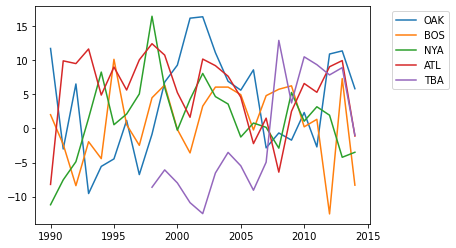

In [16]:
result = teams[teams["teamID"] == "OAK"]
plt.plot(result["yearID"], result["efficiency"], label="OAK")
result = teams[teams["teamID"] == "BOS"]
plt.plot(result["yearID"], result["efficiency"], label="BOS")
result = teams[teams["teamID"] == "NYA"]
plt.plot(result["yearID"], result["efficiency"], label="NYA")
result = teams[teams["teamID"] == "ATL"]
plt.plot(result["yearID"], result["efficiency"], label="ATL")
result = teams[teams["teamID"] == "TBA"]
plt.plot(result["yearID"], result["efficiency"], label="TBA")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# Question 4
The plot above shows us the efficienty of Oakland, the New York Yankees, Boston, Atlanta and Tampa Bay throughout the years. From this plot we can see how efficient these teams were with their money. We can see that during the moneyball period, Oakland's efficiency is the highest out of all the other teams. They were able to use their money to the best of its ability. Comparing this to the plots in question 2 and 3, we can see that it tells a different story. In question 2 and 3 Oakland can be seen as a terrible team during the moneyball period but in reality they were extremely efficient with the money they had to pay their players as we see in the problem 8 plot. 

# Extra Credit
For the extra credit I went to the same website where we downloaded our data for the project but I navigated to the main page. From there I was able to go to the archive section and find the latest data for our dataset located here: http://www.seanlahman.com/baseball-archive/statistics/ and here https://github.com/chadwickbureau/baseballdatabank/tree/master/core. The latest data for 2020 is only available in MS Access version, CSV, and in an R package. For this part, I decided to go with the CSV version and convert it to a SQLite database. Using ```requests``` library, I download the CSV files, I extract them and load them individually to a pandas dataframe. Once loaded into pandas, I can use the ```to_sql``` function to write it to our new database. For testing purposes and to prove that it has worked, I created a query to retrieve the Teams table. Here we can see the new 2020 data. This can also be done for all other tables used in the project and they will have all the latest data available.

In [17]:
import os
import requests, zipfile, io
r = requests.get("https://github.com/chadwickbureau/baseballdatabank/archive/master.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("./")


sqlite_file = 'lahman2020.sqlite'
conn = sqlite3.connect(sqlite_file)
path_to_data = "./baseballdatabank-master/core/"
for files in os.listdir(path_to_data):
    if files[-3:] == "csv":
        df = pandas.read_csv(f"{path_to_data}{files}")
        df.to_sql(files[:-4], conn, if_exists='append', index=False)

query = "SELECT * From Teams"

test = pandas.read_sql(query, conn)
test

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,None,BS1,BNA,None,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,None,CH1,CNA,None,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,None,CL1,CFC,None,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,None,FW1,KEK,None,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,None,NY2,NNA,None,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,2020,NL,SLN,STL,C,3,58,27.0,30,28,...,46,0.983,St. Louis Cardinals,Busch Stadium III,0.0,97,96,STL,SLN,SLN
2951,2020,AL,TBA,TBD,E,1,60,29.0,40,20,...,52,0.985,Tampa Bay Rays,Tropicana Field,0.0,96,95,TBR,TBA,TBA
2952,2020,AL,TEX,TEX,W,5,60,30.0,22,38,...,40,0.981,Texas Rangers,Globe Life Field,0.0,102,102,TEX,TEX,TEX
2953,2020,AL,TOR,TOR,E,3,60,26.0,32,28,...,47,0.982,Toronto Blue Jays,Sahlen Field,0.0,100,99,TOR,TOR,TOR
